In [1]:
pip install opendatasets

# Importing Required Library

In [2]:
import opendatasets as od
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression
# for encoding
from sklearn.preprocessing import LabelEncoder
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

In [3]:
dataset="https://www.kaggle.com/sobhanmoosavi/us-accidents"
od.download(dataset)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mdtanvirhayat
Your Kaggle Key: ··········


100%|██████████| 269M/269M [00:04<00:00, 67.3MB/s]


In [4]:
data_dir="./us-accidents"
os.listdir(data_dir)

['US_Accidents_Dec21_updated.csv']

In [5]:
Us_Accident= pd.read_csv('./us-accidents/US_Accidents_Dec21_updated.csv')

In [6]:
Us_Accident.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [7]:
Us_Accident.shape

(2845342, 47)

# Handling Missing Values

In [8]:
Us_Accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [9]:
Us_Accident.isnull().sum().sort_values(ascending=False)

Number                   1743911
Precipitation(in)         549458
Wind_Chill(F)             469643
Wind_Speed(mph)           157944
Wind_Direction             73775
Humidity(%)                73092
Weather_Condition          70636
Visibility(mi)             70546
Temperature(F)             69274
Pressure(in)               59200
Weather_Timestamp          50736
Airport_Code                9549
Timezone                    3659
Nautical_Twilight           2867
Civil_Twilight              2867
Sunrise_Sunset              2867
Astronomical_Twilight       2867
Zipcode                     1319
City                         137
Street                         2
Country                        0
Junction                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Turning_Loop                   0
Traffic_Signal                 0
Traffic_Calming                0
Stop                           0
Station                        0
Roundabout

In [10]:
feature_lst=['Severity','Start_Lng','Start_Time','Start_Lat','Distance(mi)','Side','City','County','State','Timezone','Temperature(F)','Humidity(%)','Pressure(in)', 'Visibility(mi)', 'Wind_Direction','Weather_Condition', 'Amenity','Bump', 'Crossing', 'Give_Way','Junction', 'No_Exit', 'Railway','Roundabout', 'Station', 'Stop','Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset']

In [11]:
# Select the dataset to include only the selected features
df_sel=Us_Accident[feature_lst].copy()
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Severity           int64  
 1   Start_Lng          float64
 2   Start_Time         object 
 3   Start_Lat          float64
 4   Distance(mi)       float64
 5   Side               object 
 6   City               object 
 7   County             object 
 8   State              object 
 9   Timezone           object 
 10  Temperature(F)     float64
 11  Humidity(%)        float64
 12  Pressure(in)       float64
 13  Visibility(mi)     float64
 14  Wind_Direction     object 
 15  Weather_Condition  object 
 16  Amenity            bool   
 17  Bump               bool   
 18  Crossing           bool   
 19  Give_Way           bool   
 20  Junction           bool   
 21  No_Exit            bool   
 22  Railway            bool   
 23  Roundabout         bool   
 24  Station            bool   
 25  Stop              

In [12]:
# Check missing values
df_sel.isnull().mean().sort_values(ascending=False)

Wind_Direction       0.025928
Humidity(%)          0.025688
Weather_Condition    0.024825
Visibility(mi)       0.024794
Temperature(F)       0.024346
Pressure(in)         0.020806
Timezone             0.001286
Sunrise_Sunset       0.001008
City                 0.000048
State                0.000000
Junction             0.000000
Turning_Loop         0.000000
Traffic_Signal       0.000000
Traffic_Calming      0.000000
Stop                 0.000000
Station              0.000000
Roundabout           0.000000
Railway              0.000000
No_Exit              0.000000
Give_Way             0.000000
County               0.000000
Crossing             0.000000
Bump                 0.000000
Amenity              0.000000
Start_Lng            0.000000
Start_Time           0.000000
Start_Lat            0.000000
Distance(mi)         0.000000
Side                 0.000000
Severity             0.000000
dtype: float64

In [13]:
df_sel.dropna(subset=df_sel.columns[df_sel.isnull().mean()!=0], how='any', axis=0, inplace=True)
df_sel.shape

(2733640, 30)

**1. After Handling the missing values Total 2733640 rows and 30 column have selected for modeling to predict accident severity:**

# Encoding

In [14]:
le=LabelEncoder()

In [15]:
from pandas.core.dtypes.common import is_numeric_dtype

In [16]:
for column in df_sel.columns:
    if is_numeric_dtype(df_sel[column]):
        continue
    else:
        df_sel[column] = le.fit_transform(df_sel[column])

In [17]:
df_sel.head()

,Severity,Start_Lng,Start_Time,Start_Lat,Distance(mi),Side,City,County,State,Timezone,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,3,-83.092860,1,40.108910,3.230,1,2606,537,33,1,...,False,False,False,False,False,False,False,False,False,1
1,2,-84.062800,2,39.865420,0.747,1,2351,1014,33,1,...,False,False,False,False,False,False,False,False,False,1
2,2,-84.524680,3,39.102660,0.055,1,1765,642,33,1,...,True,False,False,False,False,False,False,False,False,1
3,2,-81.537840,4,41.062130,0.123,1,65,1455,33,1,...,False,False,False,False,False,False,False,False,False,1
4,3,-84.492792,5,39.172393,0.500,1,1765,642,33,1,...,False,False,False,False,False,False,False,False,False,0


# Modeling



In [18]:
# Assign the data
df=df_sel


# Set the target for the prediction
target='Severity'



# Create arrays for the features and the response variable

# set X and y
y = df_sel[target]
X = df_sel.drop(target, axis=1)

# Split the data set into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

## 1. Logistics Regression

In [19]:
# Logistic regression
lr = LogisticRegression(random_state=0,max_iter=150)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

# Get the accuracy score
acc=accuracy_score(y_test, y_pred)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr.score(X_test, y_test)*100,'%'))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy of logistic regression classifier on test set: 89.05


In [20]:
print(classification_report(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00      5100
           2       0.89      1.00      0.94    486875
           3       0.00      0.00      0.00     29845
           4       0.00      0.00      0.00     24908

    accuracy                           0.89    546728
   macro avg       0.22      0.25      0.24    546728
weighted avg       0.79      0.89      0.84    546728



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


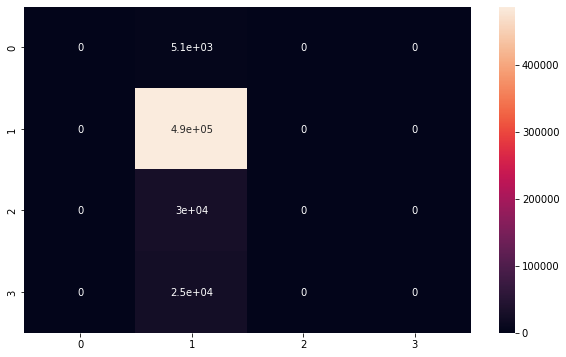

In [21]:
test_confusion_matrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize = (10,6))
sns.heatmap(test_confusion_matrix, annot=True)

In [31]:
test_confusion_matrix

array([[  3185,   1676,    200,     39],
       [   638, 478771,   3914,   3552],
       [    99,  16808,  11661,   1277],
       [    47,  12242,   1178,  11441]])

## 2. Decision Tree Classifier

In [22]:
# Decision tree algorithm

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)


# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

# Use dt_entropy to predict test set labels
y_pred= dt_entropy.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)


# Print accuracy_entropy
print('[Decision Tree -- entropy] accuracy_score: {:.3f}.'.format(accuracy_entropy))



# Instantiate dt_gini, set 'gini' as the information criterion
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)


# Fit dt_entropy to the training set
dt_gini.fit(X_train, y_train)

# Use dt_entropy to predict test set labels
y_pred= dt_gini.predict(X_test)

# Evaluate accuracy_entropy
accuracy_gini = accuracy_score(y_test, y_pred)

# Append to the accuracy list
acc=accuracy_gini


# Print accuracy_gini
print('[Decision Tree -- gini] accuracy_score: {:.3f}.'.format(accuracy_gini))

[Decision Tree -- entropy] accuracy_score: 0.903.
[Decision Tree -- gini] accuracy_score: 0.904.


In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.90      0.26      0.40      5100
           2       0.92      0.99      0.95    486875
           3       0.62      0.20      0.30     29845
           4       0.54      0.26      0.35     24908

    accuracy                           0.90    546728
   macro avg       0.75      0.43      0.50    546728
weighted avg       0.88      0.90      0.88    546728



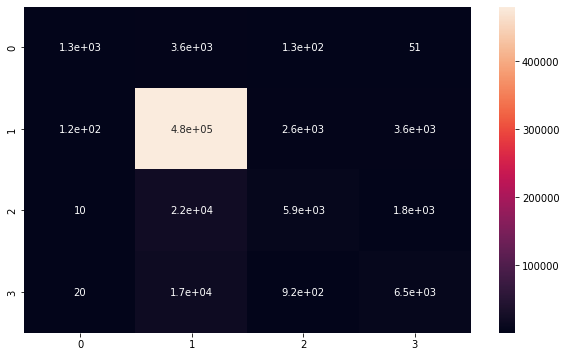

In [23]:
test_confusion_matrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize = (10,6))
sns.heatmap(test_confusion_matrix, annot=True)

## Random Forest 

In [24]:
# Random Forest algorithm

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)


# Get the accuracy score
acc=accuracy_score(y_test, y_pred)

# Append to the accuracy list
# accuracy_lst.append(acc)


# Model Accuracy, how often is the classifier correct?
print("[Randon forest algorithm] accuracy_score: {:.3f}.".format(acc))

[Randon forest algorithm] accuracy_score: 0.924.


In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.80      0.62      0.70      5100
           2       0.94      0.98      0.96    486875
           3       0.69      0.39      0.50     29845
           4       0.70      0.46      0.56     24908

    accuracy                           0.92    546728
   macro avg       0.78      0.61      0.68    546728
weighted avg       0.91      0.92      0.91    546728



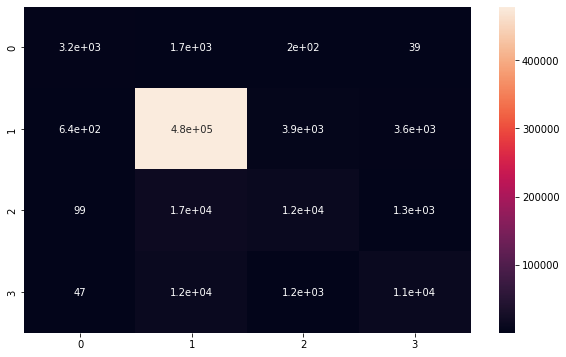

In [26]:
test_confusion_matrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize = (10,6))
sns.heatmap(test_confusion_matrix, annot=True)

No handles with labels found to put in legend.


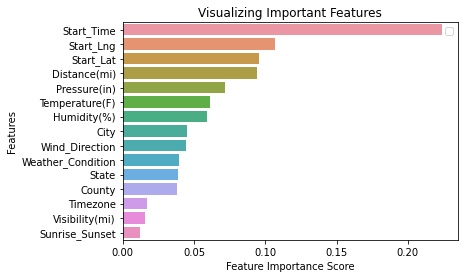

In [27]:
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)

# Creating a bar plot, displaying only the top k features
k=15
sns.barplot(x=feature_imp[:15], y=feature_imp.index[:k])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

## XgBoost

In [28]:
clf=XGBClassifier()
clf.fit(X_train,y_train)
y_predict=clf.predict(X_test)

In [33]:
print(accuracy_score(y_test, y_pred)*100)

92.37829414260838


In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.80      0.62      0.70      5100
           2       0.94      0.98      0.96    486875
           3       0.69      0.39      0.50     29845
           4       0.70      0.46      0.56     24908

    accuracy                           0.92    546728
   macro avg       0.78      0.61      0.68    546728
weighted avg       0.91      0.92      0.91    546728



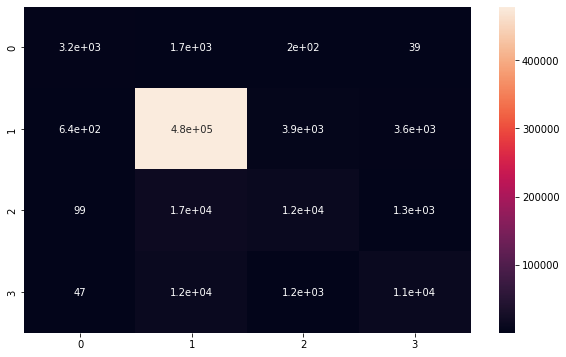

In [30]:
test_confusion_matrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize = (10,6))
sns.heatmap(test_confusion_matrix, annot=True)

## Balanced Random Forest Classifier

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [ ]:
clf = BalancedRandomForestClassifier(random_state = 0)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy=accuracy_score(y_test, y_pred)

print(accuracy)

0.7829213063900148


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.27      0.96      0.42      5100
           2       0.99      0.79      0.88    486875
           3       0.28      0.77      0.41     29845
           4       0.29      0.68      0.41     24908

    accuracy                           0.78    546728
   macro avg       0.46      0.80      0.53    546728
weighted avg       0.91      0.78      0.83    546728



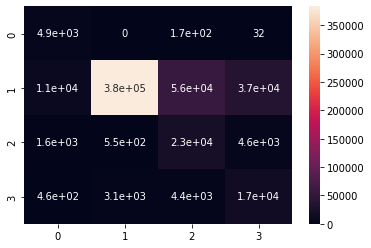

In [ ]:
test_confusion_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(test_confusion_matrix, annot=True)